In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [187]:
def cal_scores(match,fname):
    both_inn = {}
    innings_num = 0
    for inn in match['innings']:
        innings_num +=1
        if(innings_num > 2):
                break
        inn_score = inn_scores(inn['overs'])
        inn_score['team'] = inn['team']
        res = {'inn_' + str(innings_num) + '_' + str(key): val for key, val in inn_score.items()}
        both_inn = {**both_inn,**res}
        
        
    if 'city' in match['info']:
        both_inn['city'] = match['info']['city']
    else:
        both_inn['city'] = ''
    both_inn['date'] = match['info']['dates'][0]
    both_inn['venue'] = match['info']['venue']
    
    if 'winner' in match['info']['outcome']:
        outcome = match['info']['outcome']['winner']
    else:
        outcome = match['info']['outcome']['result']
    both_inn['outcome'] = outcome
    
    
    both_inn['toss_winner'] = match['info']['toss']['winner']
    both_inn['toss_decision'] = match['info']['toss']['decision']
    
    if (both_inn['inn_1_team'] == outcome ):
        both_inn['bat_first_win'] = True
    else:
        both_inn['bat_first_win'] = False
    
    return both_inn  

In [87]:
def inn_scores(overs):
    over_num = 0
    total_runs = 0
    total_4s = 0
    total_6s = 0
    total_0s = 0
    total_1s = 0
    total_2s = 0
    total_3s = 0
    total_extras = 0
    total_wickets = 0
    total_other_runs = 0
    
    pp_runs = 0
    pp_4s = 0
    pp_6s = 0
    pp_0s = 0
    pp_1s = 0
    pp_2s = 0
    pp_3s = 0
    pp_wickets = 0
    pp_extras = 0
    pp_other_runs = 0
    wickets_dict = {}
    
    for over in overs:
        over_num = over['over']
        for delivery in over['deliveries']:
        
            batter_runs = delivery['runs']['batter']
            extra_runs = delivery['runs']['extras']
           
            if over_num < 6: 
                if batter_runs == 0:
                    pp_0s += 1
                    total_0s +=1
                    
                elif batter_runs == 1:
                    pp_1s += 1
                    total_1s += 1
                    
                elif batter_runs == 2:
                    pp_2s +=1
                    total_2s += 1
                
                elif batter_runs == 3:
                    pp_3s += 1
                    total_3s
                
                elif batter_runs == 4:
                    pp_4s += 1
                    total_4s += 1
                
                elif batter_runs == 6:
                    pp_6s += 1
                    total_6s += 1
                
                else:
                    pp_other_runs += batter_runs
                    total_other_runs += batter_runs
                
                pp_extras += extra_runs 
                pp_runs += batter_runs
                
                total_extras += extra_runs
                total_runs += (batter_runs + extra_runs)
                
            else:
                if batter_runs == 0:
                   
                    total_0s +=1
                    
                elif batter_runs == 1:
                   
                    total_1s += 1
                    
                elif batter_runs == 2:
                   
                    total_2s += 1
                
                elif batter_runs == 3:
                   
                    total_3s
                
                elif batter_runs == 4:
                   
                    total_4s += 1
                
                elif batter_runs == 6:
                    
                    total_6s += 1
                
                else:
                    
                    total_other_runs += batter_runs
                
                total_extras += extra_runs
                total_runs += (batter_runs + extra_runs)
                
            
            if 'wickets' in delivery:
                for wicket in delivery['wickets']:
                    wicket_kind = wicket['kind']
                    if wicket_kind in wickets_dict:
                        wickets_dict[wicket_kind] += 1
                    else:
                        wickets_dict[wicket_kind] = 1
                        
                    if over_num < 6: 
                        pp_wickets +=1
                        total_wickets +=1
                        
                    else:
                        total_wickets +=1
                        

    final_dict = {
            
            'total_runs' : total_runs,
            'total_4s' : total_4s,
            'total_6s' : total_6s,
            'total_0s' : total_0s,
            'total_1s' : total_1s,
            'total_2s' : total_2s,
            'total_3s' : total_3s,
            'total_extras' : total_extras,
            'total_wickets' : total_wickets,
            'total_other_runs' : total_other_runs,
            'pp_runs' : pp_runs,
            'pp_4s' : pp_4s,
            'pp_6s' : pp_6s,
            'pp_0s' : pp_0s,
            'pp_1s' : pp_1s,
            'pp_2s' : pp_2s,
            'pp_3s' : pp_3s,
            'pp_wickets' : pp_wickets,
            'pp_extras' : pp_extras,
            'pp_other_runs' : pp_other_runs
    }   
    
    return {**final_dict,**wickets_dict}
            
            
        

In [369]:
def read_data(foldername):
    all_matches = os.listdir(folder_name)
    all_match_scores = []
    for match in all_matches:
        if match != 'README.txt':
            fname = folder_name + '/' + match
            with open(fname, 'r') as f:
                match_data = json.load(f)
                match_summary = cal_scores(match_data,fname)
                all_match_scores.append(match_summary)
    df_all_match = pd.DataFrame(all_match_scores)
    return df_all_match
    
    

In [376]:
# read data from JSON files into dataframe
df_T20I = read_data('t20s_male_json')
df_BBL = read_data('bbl_male_json')


# combine dataframes
all_T20s = pd.concat([df_T20I, df_BBL])

# Remove NAs
all_T20s = all_T20s.fillna(0)


In [366]:
# same venues (cricket grounds) in data have different names, 
# this function will create uniform names for T20 2022 worldcup venues


In [377]:
# df_all_t20['venue'].value_counts().keys().tolist()

def venue_names(row):
    if (row['venue'] == 'Bellerive Oval' or
        row['venue'] =='Bellerive Oval, Hobart'):
        return 'Bellerive Oval, Hobart'
    
    if (row['venue'] == 'GMHBA Stadium, South Geelong, Victoria' or 
       row['venue'] == 'Simonds Stadium, South Geelong' or 
       row['venue'] == 'Geelong Cricket Ground'):
        return 'Kardinia Park, Geelong'
    
    if (row['venue'] == 'Brisbane Cricket Ground, Woolloongabba' or 
       row['venue'] == 'Brisbane Cricket Ground, Woolloongabba, Brisbane' or
       row['venue'] == 'Brisbane Cricket Ground'):
        
        return 'The Gabba, Brisbane'
    
    else:
        return row['venue']
        


In [378]:
# all venues in this worldcup
all_venues_t20_2022 = ['Adelaide Oval',
                       'Bellerive Oval, Hobart',
                       'Kardinia Park, Geelong',
                       'Melbourne Cricket Ground',
                       'Perth Stadium',
                       'Sydney Cricket Ground',
                       'The Gabba, Brisbane']

In [380]:
# clean up venue names
all_T20s['venue'] = all_T20s.apply(venue_names,axis=1)

# filter macthes from these venues only
all_T20s_filtered = all_T20s[all_T20s['venue'].isin(all_venues_t20_2022)]

In [382]:
all_T20s_filtered['venue'].value_counts()

Adelaide Oval               124
Melbourne Cricket Ground    114
Bellerive Oval, Hobart       98
Sydney Cricket Ground        98
The Gabba, Brisbane          96
Perth Stadium                42
Kardinia Park, Geelong        8
Name: venue, dtype: int64

In [383]:
# func to calculate stats for each venue
def venue_stats(df,venue):
    subset = df[df['venue'] == venue]
    
    inn_1_avg = subset['inn_1_total_runs'].mean()
    inn_2_avg = subset['inn_2_total_runs'].mean()
    
    inn_1_pp_avg = subset['inn_1_pp_runs'].mean()
    inn_2_pp_avg = subset['inn_2_pp_runs'].mean()
    
    avg_bound_inn_1 = subset['inn_1_total_4s'].mean() + subset['inn_1_total_6s'].mean() 
    avg_bound_inn_2 = subset['inn_2_total_4s'].mean() + subset['inn_2_total_6s'].mean() 
    
    avg_wickets_inn_1 = subset['inn_1_total_wickets'].mean()
    avg_wickets_inn_2 = subset['inn_2_total_wickets'].mean()
    
    avg_wick_pp_1 = subset['inn_1_pp_wickets'].mean()
    avg_wick_pp_2 = subset['inn_2_pp_wickets'].mean()
    
    total_matches = subset.shape[0]
    batt_1_won =  subset[(subset['outcome'] == subset['inn_1_team'])].shape[0]
    batt_2_won = subset[(subset['outcome'] == subset['inn_2_team'])].shape[0]
    
    
    selc_cols = ['inn_1_total_runs','inn_2_total_runs','inn_1_pp_runs',  'inn_2_pp_runs' ]
    temp = subset[selc_cols]
    temp.columns = ['Inning 1',"Inning 2", "Power Play Inn 1", "Power Play Inn 2" ]
    temp = pd.melt(temp)
    p = sns.boxplot(x="variable", y="value", data=temp)
    p.set_xlabel("Runs")
    p.set_ylabel("Average")
    p.set_title('Averages at ' + venue)
    plt.show()
    
    print(f"Avg Runs 1st Innings {inn_1_avg:.2f}, \nAvg Runs 2nd Innings {inn_2_avg:.2f},")
    print(f"Avg Runs 1st Innings Power Play {inn_1_pp_avg:.2f}, \nAvg Runs 2nd Innings Power Play {inn_2_pp_avg:.2f},")
    
    print(f"Avg Boundires 1st Innings {avg_bound_inn_1:.2f},\nAvg Boundires 2nd Innings {avg_bound_inn_2:.2f}, ")
    print(f"Avg Wickets 1st Innings {avg_wickets_inn_1:.2f},\nAvg Wickets 2nd Innings {avg_wickets_inn_2:.2f}, ")
    print(f"Avg Wickets 1st Innings PowerPlay {avg_wick_pp_1:.2f},\nAvg Wickets 2nd Innings PowerPlay {avg_wick_pp_2:.2f} ")
    print(f"Won Batting 1st: {(batt_1_won/total_matches)*100:.2f}%,\nWon Batting 2nd: {(batt_2_won/total_matches)*100:.2f}%")
    

    

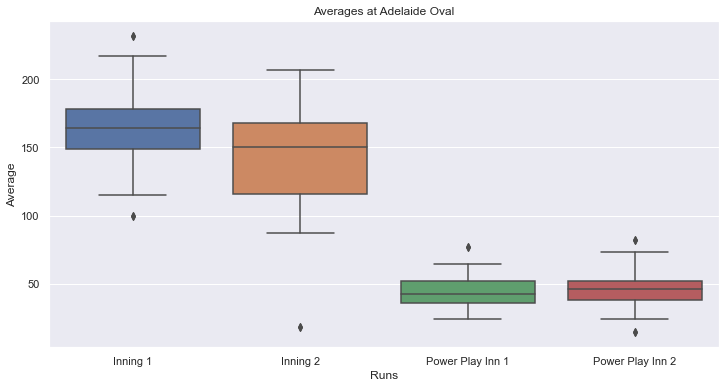

Avg Runs 1st Innings 164.39, 
Avg Runs 2nd Innings 143.84,
Avg Runs 1st Innings Power Play 44.18, 
Avg Runs 2nd Innings Power Play 45.95,
Avg Boundires 1st Innings 18.92,
Avg Boundires 2nd Innings 16.31, 
Avg Wickets 1st Innings 6.18,
Avg Wickets 2nd Innings 6.18, 
Avg Wickets 1st Innings PowerPlay 1.32,
Avg Wickets 2nd Innings PowerPlay 1.34 
Won Batting 1st: 59.68%,
Won Batting 2nd: 38.71%


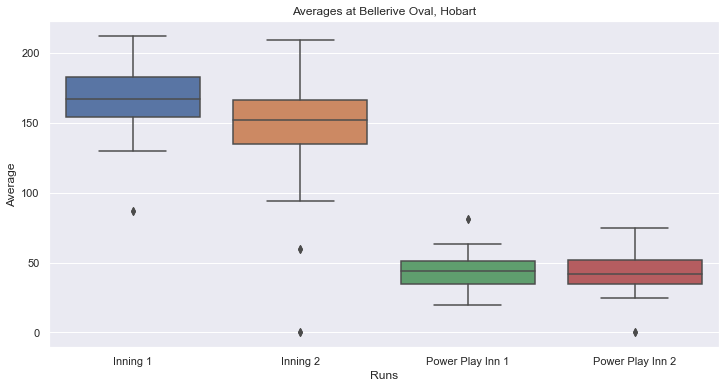

Avg Runs 1st Innings 167.82, 
Avg Runs 2nd Innings 147.43,
Avg Runs 1st Innings Power Play 44.12, 
Avg Runs 2nd Innings Power Play 43.27,
Avg Boundires 1st Innings 19.55,
Avg Boundires 2nd Innings 17.12, 
Avg Wickets 1st Innings 6.04,
Avg Wickets 2nd Innings 6.16, 
Avg Wickets 1st Innings PowerPlay 1.37,
Avg Wickets 2nd Innings PowerPlay 1.39 
Won Batting 1st: 57.14%,
Won Batting 2nd: 40.82%


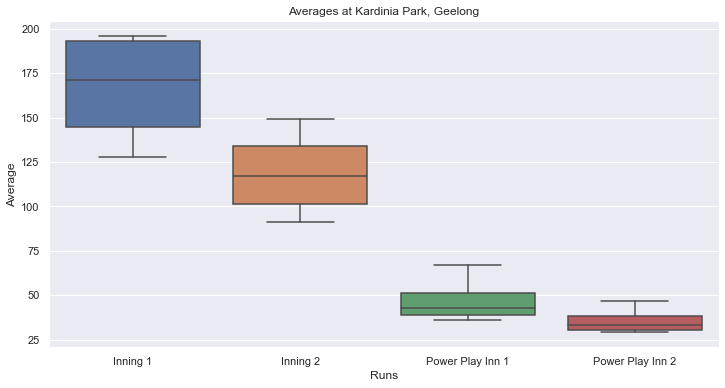

Avg Runs 1st Innings 166.50, 
Avg Runs 2nd Innings 118.50,
Avg Runs 1st Innings Power Play 47.25, 
Avg Runs 2nd Innings Power Play 35.50,
Avg Boundires 1st Innings 19.00,
Avg Boundires 2nd Innings 11.75, 
Avg Wickets 1st Innings 4.75,
Avg Wickets 2nd Innings 8.50, 
Avg Wickets 1st Innings PowerPlay 0.75,
Avg Wickets 2nd Innings PowerPlay 1.75 
Won Batting 1st: 75.00%,
Won Batting 2nd: 25.00%


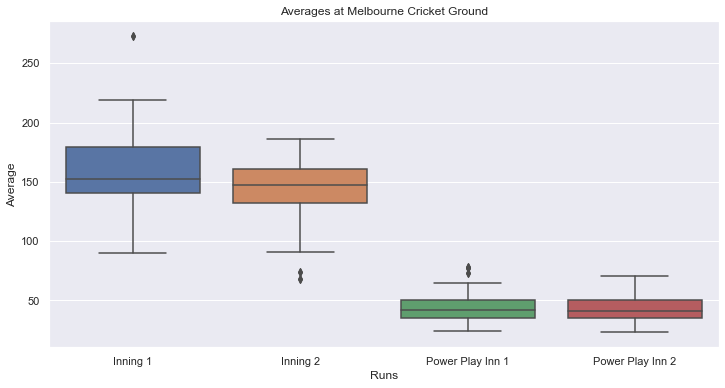

Avg Runs 1st Innings 159.49, 
Avg Runs 2nd Innings 145.26,
Avg Runs 1st Innings Power Play 43.68, 
Avg Runs 2nd Innings Power Play 42.53,
Avg Boundires 1st Innings 16.39,
Avg Boundires 2nd Innings 15.53, 
Avg Wickets 1st Innings 6.51,
Avg Wickets 2nd Innings 5.82, 
Avg Wickets 1st Innings PowerPlay 1.30,
Avg Wickets 2nd Innings PowerPlay 1.63 
Won Batting 1st: 42.11%,
Won Batting 2nd: 56.14%


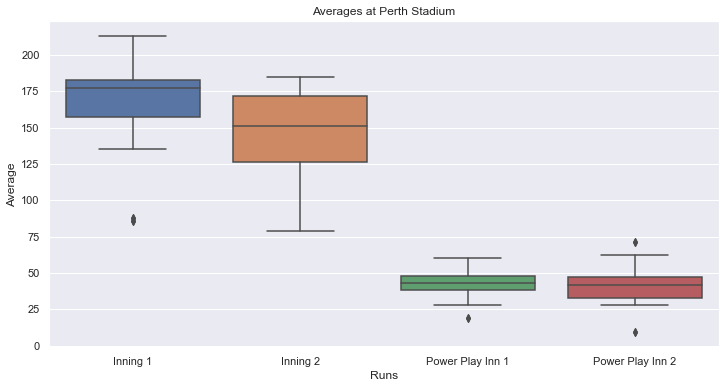

Avg Runs 1st Innings 166.95, 
Avg Runs 2nd Innings 142.14,
Avg Runs 1st Innings Power Play 42.86, 
Avg Runs 2nd Innings Power Play 41.00,
Avg Boundires 1st Innings 19.10,
Avg Boundires 2nd Innings 16.95, 
Avg Wickets 1st Innings 5.48,
Avg Wickets 2nd Innings 6.76, 
Avg Wickets 1st Innings PowerPlay 1.10,
Avg Wickets 2nd Innings PowerPlay 2.10 
Won Batting 1st: 61.90%,
Won Batting 2nd: 38.10%


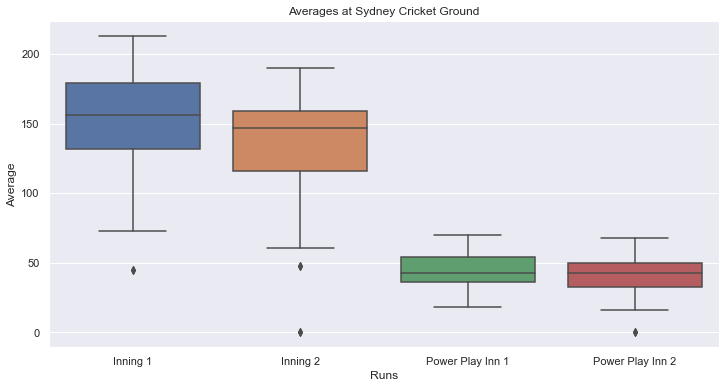

Avg Runs 1st Innings 155.51, 
Avg Runs 2nd Innings 134.65,
Avg Runs 1st Innings Power Play 43.92, 
Avg Runs 2nd Innings Power Play 41.37,
Avg Boundires 1st Innings 16.63,
Avg Boundires 2nd Innings 14.86, 
Avg Wickets 1st Innings 6.41,
Avg Wickets 2nd Innings 5.63, 
Avg Wickets 1st Innings PowerPlay 1.65,
Avg Wickets 2nd Innings PowerPlay 1.65 
Won Batting 1st: 42.86%,
Won Batting 2nd: 51.02%


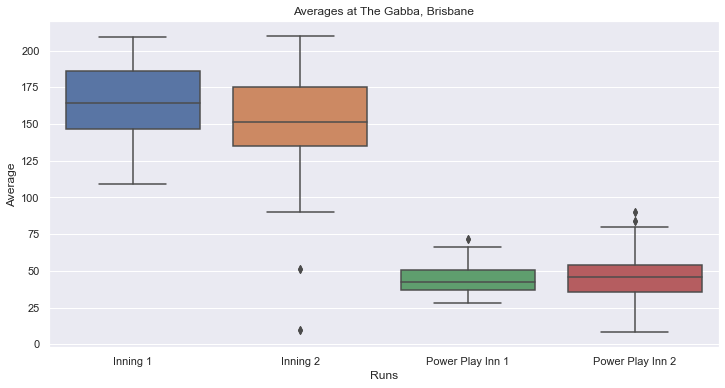

Avg Runs 1st Innings 164.04, 
Avg Runs 2nd Innings 150.06,
Avg Runs 1st Innings Power Play 43.94, 
Avg Runs 2nd Innings Power Play 46.75,
Avg Boundires 1st Innings 17.60,
Avg Boundires 2nd Innings 17.06, 
Avg Wickets 1st Innings 6.60,
Avg Wickets 2nd Innings 5.98, 
Avg Wickets 1st Innings PowerPlay 1.60,
Avg Wickets 2nd Innings PowerPlay 1.73 
Won Batting 1st: 41.67%,
Won Batting 2nd: 54.17%


In [384]:
for v in all_venues_t20_2022:
    venue_stats(all_T20s_filtered,v)
    

In [ ]:
# some comparitive analysis among the veneues

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Adelaide Oval'),
  Text(1, 0, 'Melbourne Cricket Ground'),
  Text(2, 0, 'Bellerive Oval, Hobart'),
  Text(3, 0, 'Sydney Cricket Ground'),
  Text(4, 0, 'The Gabba, Brisbane'),
  Text(5, 0, 'Perth Stadium'),
  Text(6, 0, 'Kardinia Park, Geelong')])

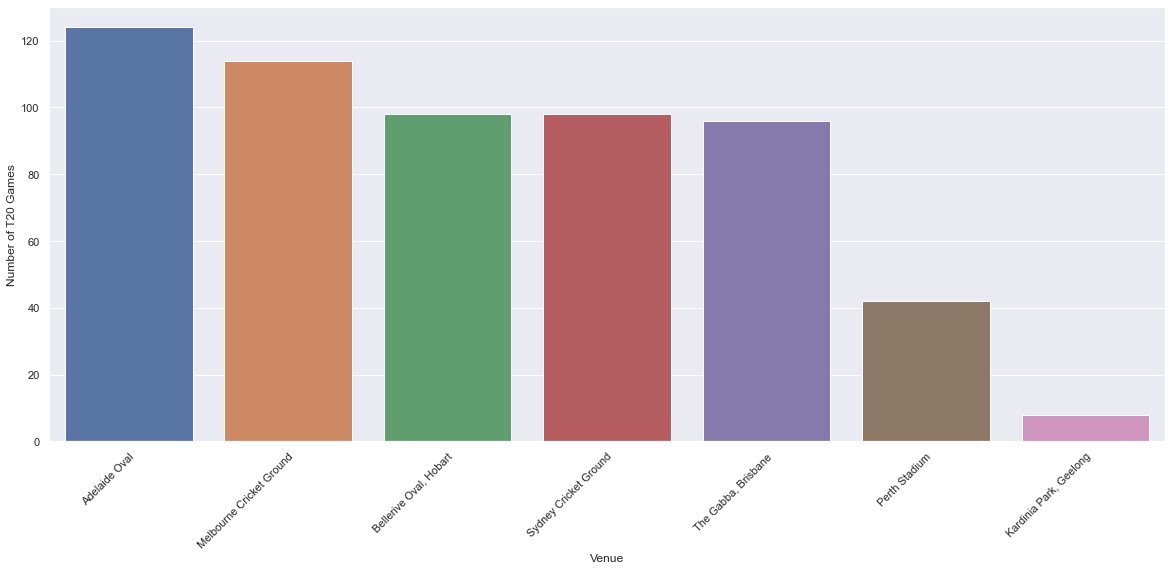

In [387]:
sns.set(rc = {'figure.figsize':(20,8)})
p = sns.countplot(x='venue', 
                  data=all_T20s_filtered,
                 order = all_T20s_filtered['venue'].value_counts().index)
p.set_xlabel("Venue")
p.set_ylabel("Number of T20 Games")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')


In [388]:
t20_venue_avgs = all_T20s_filtered.groupby('venue').mean().reset_index()
t20_venue_avgs

,venue,inn_1_total_runs,inn_1_total_4s,inn_1_total_6s,inn_1_total_0s,inn_1_total_1s,inn_1_total_2s,inn_1_total_3s,inn_1_total_extras,inn_1_total_wickets,...,inn_1_lbw,inn_1_stumped,inn_2_caught and bowled,inn_2_lbw,inn_1_retired hurt,inn_2_stumped,inn_2_retired hurt,inn_2_hit wicket,inn_1_hit wicket,inn_2_obstructing the field
0,Adelaide Oval,164.387097,12.903226,6.016129,44.209677,48.193548,9.516129,0.0,6.935484,6.177419,...,0.354839,0.048387,0.080645,0.516129,0.000000,0.129032,0.000000,0.032258,0.0,0.000000
1,"Bellerive Oval, Hobart",167.816327,14.061224,5.489796,41.367347,48.346939,11.183673,0.0,6.040816,6.040816,...,0.326531,0.081633,0.061224,0.469388,0.000000,0.163265,0.000000,0.000000,0.0,0.000000
2,"Kardinia Park, Geelong",166.500000,13.250000,5.750000,42.750000,52.250000,9.000000,0.0,6.500000,4.750000,...,0.500000,0.000000,0.250000,1.250000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000
3,Melbourne Cricket Ground,159.491228,12.210526,4.175439,45.122807,48.368421,12.842105,0.0,7.859649,6.508772,...,0.368421,0.245614,0.157895,0.315789,0.000000,0.245614,0.017544,0.017544,0.0,0.000000
4,Perth Stadium,166.952381,13.142857,5.952381,44.857143,46.809524,9.809524,0.0,8.809524,5.476190,...,0.333333,0.238095,0.285714,0.285714,0.047619,0.095238,0.000000,0.000000,0.0,0.000000
5,Sydney Cricket Ground,155.510204,11.816327,4.816327,45.693878,44.469388,11.938776,0.0,7.755102,6.408163,...,0.387755,0.265306,0.102041,0.387755,0.020408,0.204082,0.020408,0.020408,0.0,0.000000
6,"The Gabba, Brisbane",164.041667,12.187500,5.416667,46.791667,45.416667,12.479167,0.0,8.562500,6.604167,...,0.333333,0.187500,0.104167,0.250000,0.000000,0.125000,0.000000,0.020833,0.0,0.020833


# inning 1 avg total

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bellerive Oval, Hobart'),
  Text(1, 0, 'Perth Stadium'),
  Text(2, 0, 'Kardinia Park, Geelong'),
  Text(3, 0, 'Adelaide Oval'),
  Text(4, 0, 'The Gabba, Brisbane'),
  Text(5, 0, 'Melbourne Cricket Ground'),
  Text(6, 0, 'Sydney Cricket Ground')])

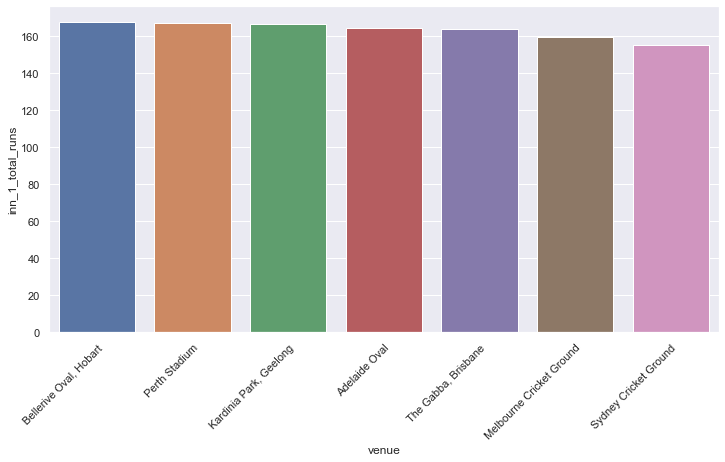

In [389]:
sns.set(rc = {'figure.figsize':(12,6)})
p = sns.barplot(data=t20_venue_avgs, x="venue", y="inn_1_total_runs",
               order=t20_venue_avgs.sort_values('inn_1_total_runs',ascending=False).venue)
# p.set_xlabel("Type of Match")
# p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
# plt.tight_layout()
# plt


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'The Gabba, Brisbane'),
  Text(1, 0, 'Bellerive Oval, Hobart'),
  Text(2, 0, 'Melbourne Cricket Ground'),
  Text(3, 0, 'Adelaide Oval'),
  Text(4, 0, 'Perth Stadium'),
  Text(5, 0, 'Sydney Cricket Ground'),
  Text(6, 0, 'Kardinia Park, Geelong')])

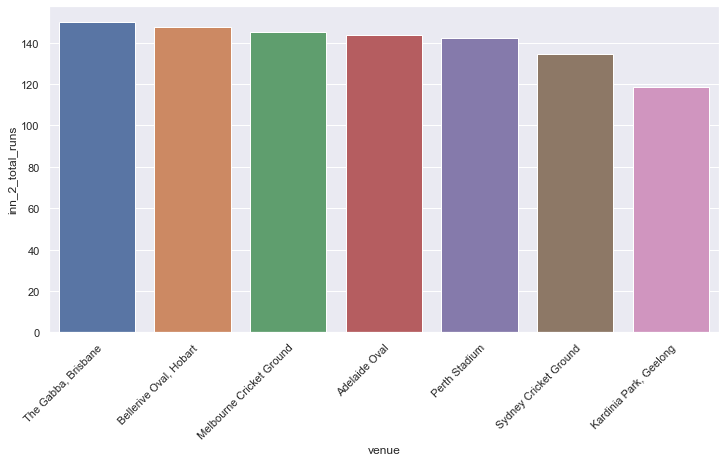

In [390]:
sns.set(rc = {'figure.figsize':(12,6)})
p = sns.barplot(data=t20_venue_avgs, x="venue", y="inn_2_total_runs",
               order=t20_venue_avgs.sort_values('inn_2_total_runs',ascending=False).venue)
# p.set_xlabel("Type of Match")
# p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
# plt.tight_layout()
# plt
